<h1>Assignment V– Individual Take Home Assignment</h1>

In [75]:
# import libraries
%matplotlib inline

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

import statsmodels.api as sm

from math import sqrt
from sklearn.metrics import mean_squared_error

from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)

import time

<h3>1. Simulate time series (TS1) </h3>

In [76]:
# ARMA(2,2) with AR coefficients 0.75 and -0.25, and MA coefficients 0.65 and 0.35

arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
arparams = np.r_[1, -arparams] # add zero-lag and negate
maparams = np.r_[1, maparams] # add zero-lag
nobs = 500
TS1 = arma_generate_sample(arparams, maparams, nobs)

<h3>2. Simulate time series (TS2) </h3>
Introduce 25 extreme observations to the above data series (TS1) and save the new series as TS2.

In [77]:
# Introducing 25 extreme observations to a copy of TS1 and saving as TS2
TS2 = np.copy(TS1)
TS2[np.random.choice(501, 25)]=1*np.random.randn(25)+10

<h3>3. Model fitting procedure for TS1</h3>
Classical time series model fitting for known artificial data

In [78]:
# add dates information
dates = sm.tsa.datetools.dates_from_range('1980m1', length=nobs)
TS1 = pd.Series(TS1, index=dates)

(-7.497334390633795,
 4.5774564652911975e-12,
 7,
 492,
 {'1%': -2.5702992925837793,
  '5%': -1.9415595740738727,
  '10%': -1.6162911615405613},
 1387.4263294783946)

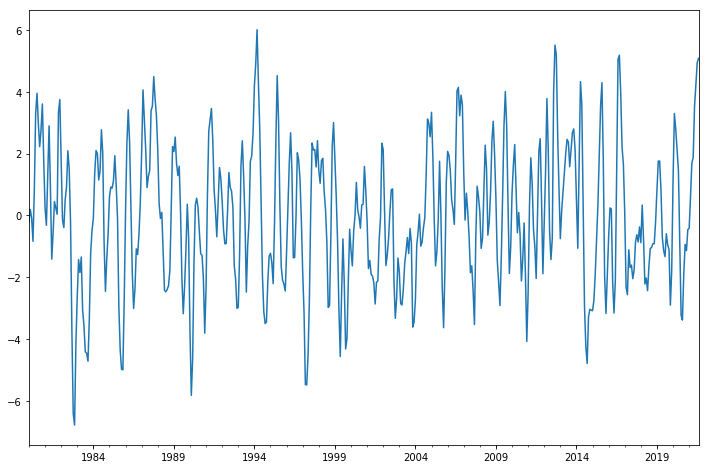

In [116]:
# plot TS1
TS1.plot(figsize=(12,8));
sm.tsa.stattools.adfuller(TS1, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

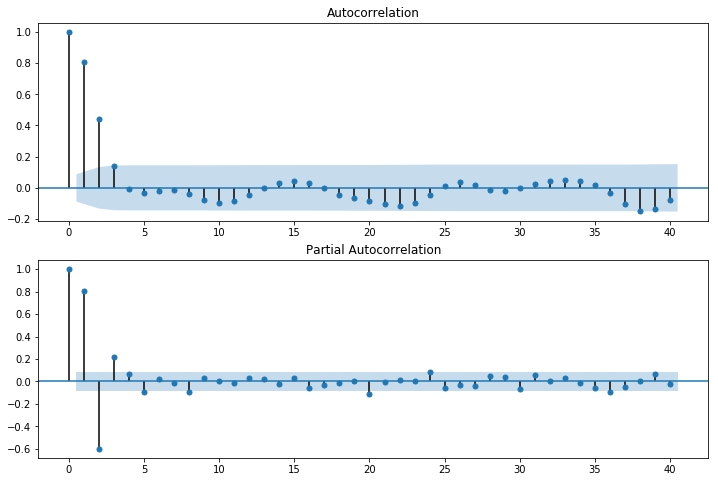

In [80]:
# plot ACF & PACF for TS1
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(TS1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(TS1, lags=40, ax=ax2)

In [81]:
# split data into train and test-sets
TS1_train, TS1_test = TS1[0:-12], TS1[-12:]

# model ARMA (2,2) for TS1 and print summary
start_time = time.time()

arma_mod_TS1 = sm.tsa.ARMA(TS1_train, order=(2,2))
arma_res_TS1 = arma_mod_TS1.fit(trend='nc', disp=-1)

end_time = time.time()
runtime = end_time - start_time

print(arma_res_TS1.summary())
print("Runtime:",runtime)

C:\ProgramData\Miniconda3\envs\sample1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  488
Model:                     ARMA(2, 2)   Log Likelihood                -699.765
Method:                       css-mle   S.D. of innovations              1.013
Date:                Sun, 01 Mar 2020   AIC                           1409.530
Time:                        18:29:52   BIC                           1430.481
Sample:                    01-31-1980   HQIC                          1417.760
                         - 08-31-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7352      0.110      6.702      0.000       0.520       0.950
ar.L2.y       -0.2357      0.088     -2.683      0.008      -0.408      -0.063
ma.L1.y        0.7038      0.106      6.653      0.0

In [82]:
# Tail of training set of TS1
TS1_train.tail()

2020-04-30    2.144944
2020-05-31    1.460525
2020-06-30   -0.956910
2020-07-31   -3.233294
2020-08-31   -3.386809
dtype: float64

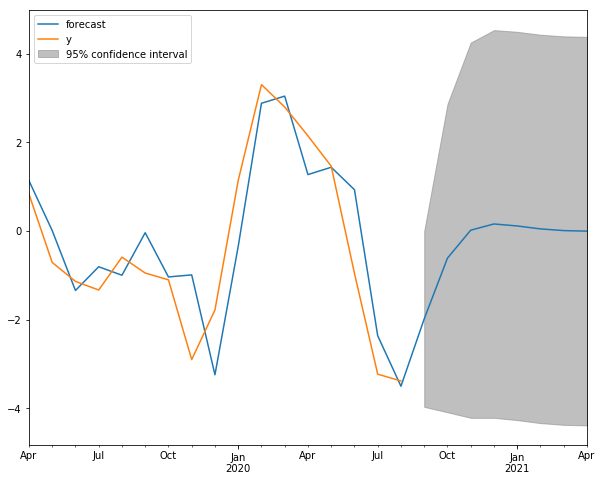

In [83]:
# plot forecasted values for TS1
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
fig = arma_res_TS1.plot_predict(start='2019-04-30', end='2021-04-30', ax=ax)
legend = ax.legend(loc='upper left')

Test RMSE: 2.727


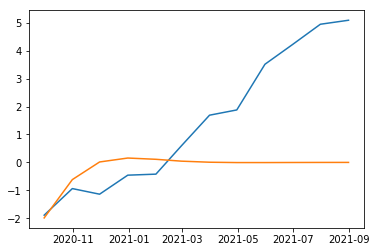

In [84]:
# plot forecasted values vs observed values for validation data in TS1 and print root mean square error
predictions = arma_res_TS1.predict(start='2020-09-30', end='2021-08-31', dynamic=True)
# report performance
rmse = sqrt(mean_squared_error(TS1_test, predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(TS1_test)
pyplot.plot(predictions)
pyplot.show()

<h3>3. Model fitting procedure for TS2</h3>
Classical time series model fitting for unknown artificial data

In [85]:
# add dates information to TS2
dates = sm.tsa.datetools.dates_from_range('1980m1', length=nobs)
TS2 = pd.Series(TS2, index=dates)

(-14.467977396372097,
 5.812867264889022e-26,
 0,
 499,
 {'1%': -2.570235127328806,
  '5%': -1.9415515392663392,
  '10%': -1.6162984308912038},
 2340.9853238953683)

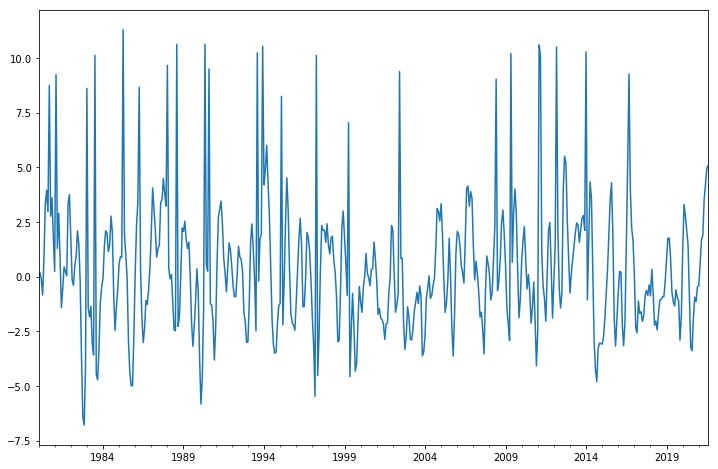

In [117]:
# plot TS2
TS2.plot(figsize=(12,8));
sm.tsa.stattools.adfuller(TS2, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

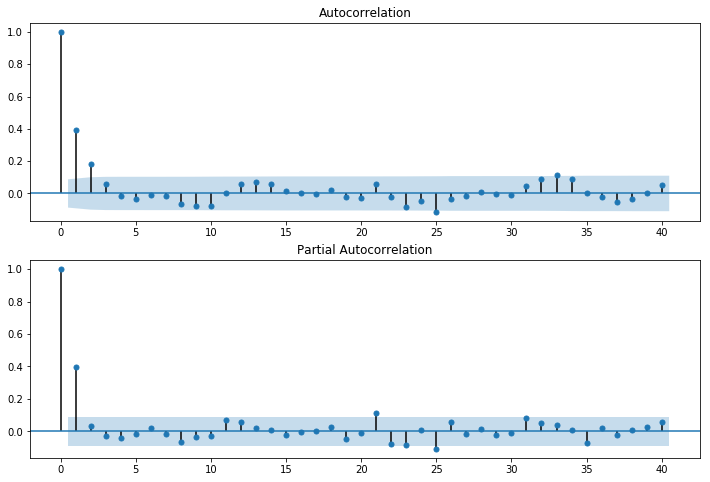

In [87]:
# ACF and PACF for TS2
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(TS2.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(TS2, lags=40, ax=ax2)

In [88]:
# Loop to test multiple combinations of AR, MA values 
for x in range(3):
    for y in range(3):
        arma_mod = sm.tsa.ARMA(TS2, (x,y)).fit(disp=False)
        print("X:",x)
        print("Y:",y)
        print(arma_mod.aic, arma_mod.bic, arma_mod.hqic)


C:\ProgramData\Miniconda3\envs\sample1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\ProgramData\Miniconda3\envs\sample1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\ProgramData\Miniconda3\envs\sample1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\ProgramData\Miniconda3\envs\sample1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\ProgramData\Miniconda3\envs\sample1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so infe

X: 0
Y: 0
2521.0481516739233 2529.4773678707675 2524.3557623363263
X: 0
Y: 1
2454.0395122099117 2466.6833365051784 2459.000928203516
X: 0
Y: 2
2442.580677154195 2459.439109547884 2449.1958984790012
X: 1
Y: 0
2438.8140296086217 2451.4578539038885 2443.7754456022262
X: 1
Y: 1
2440.214438390107 2457.0728707837957 2446.829659714913
X: 1
Y: 2
2441.712164211557 2462.785204703668 2449.9811908675642
X:

C:\ProgramData\Miniconda3\envs\sample1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\ProgramData\Miniconda3\envs\sample1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


 2
Y: 0
2440.117844984379 2456.976277378068 2446.7330663091852
X: 2
Y: 1
2441.993075527876 2463.066116019987 2450.262102183883


C:\ProgramData\Miniconda3\envs\sample1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\ProgramData\Miniconda3\envs\sample1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


X: 2
Y: 2
2442.7334801162733 2468.0211287068064 2452.656312103482


In [113]:
# split data into train and test-sets
TS2_train, TS2_test = TS2[0:-12], TS2[-12:]

start_time = time.time()

# fit ARMA (2,2) to TS2
arma_mod_TS2 = sm.tsa.ARMA(TS2_train, (1,1)).fit(disp=False)

end_time = time.time()
runtime = end_time - start_time

print(arma_mod_TS2.params)
print(arma_mod_TS2.aic, arma_mod_TS2.bic, arma_mod_TS2.hqic)
print("Runtime", runtime)

const      0.361525
ar.L1.y    0.446071
ma.L1.y   -0.072266
dtype: float64
2389.1571357425864 2405.918397365999 2395.74102405854
Runtime 0.09983134269714355


C:\ProgramData\Miniconda3\envs\sample1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [90]:
# Durbin Watson Test
print(sm.stats.durbin_watson(arma_mod_TS2.resid.values))

1.9993581572867287


In [91]:
# Ljung–Box test
sm.stats.acorr_ljungbox(arma_mod_TS2.resid.values, lags=[20])

(array([11.49613543]), array([0.93232825]))

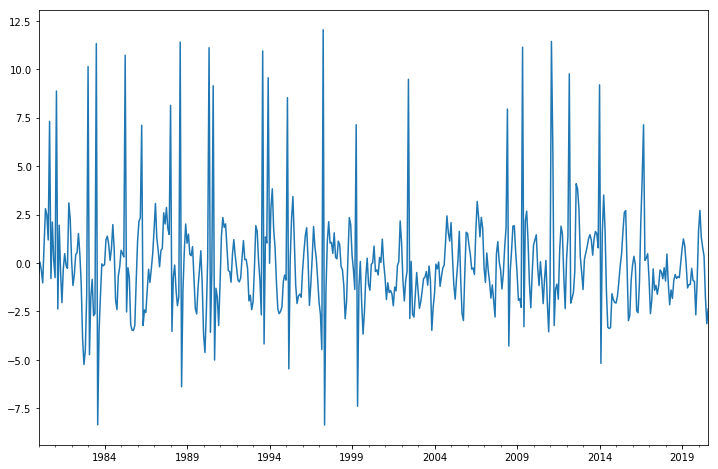

In [92]:
# residual plot for TS2 on ARMA (2,2)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod_TS2.resid.plot(ax=ax);

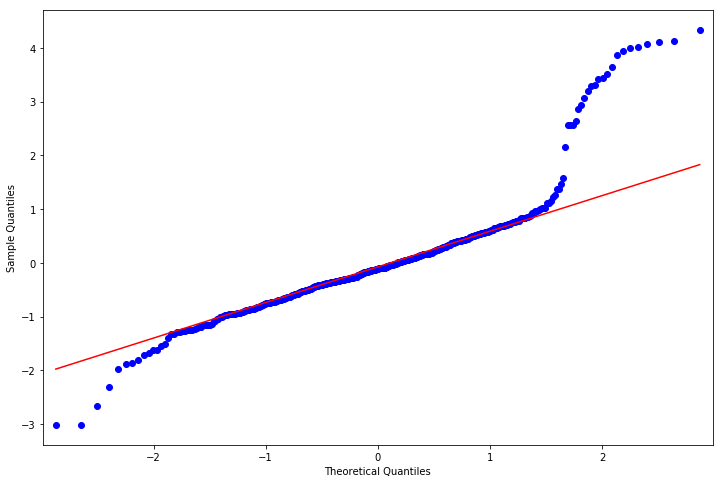

In [93]:
# Q-Q Plot

resid = arma_mod_TS2.resid
stats.normaltest(resid)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

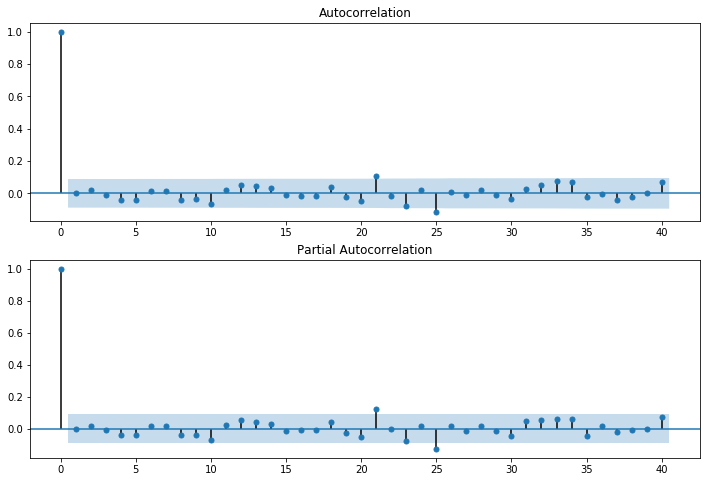

In [94]:
# Residual ACF & PACF for TS2 

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [95]:
# tail of TS2 training test 

TS2_train.tail()

2020-04-30    2.144944
2020-05-31    1.460525
2020-06-30   -0.956910
2020-07-31   -3.233294
2020-08-31   -3.386809
dtype: float64

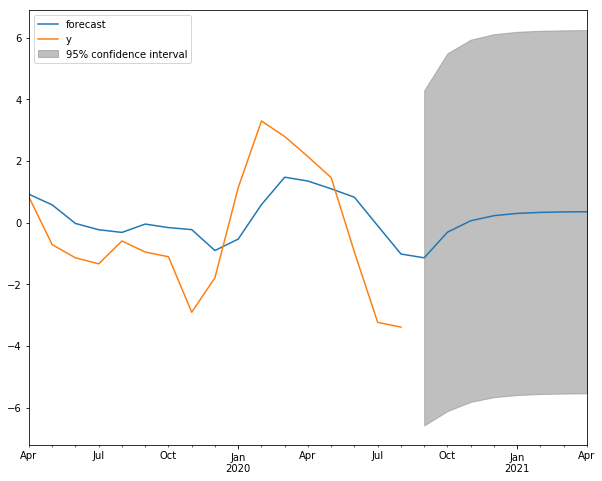

In [96]:
# forecest for TS2 with ARMA (2,2) model

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
fig = arma_mod_TS2.plot_predict(start='2019-04-30', end='2021-04-30', ax=ax)
legend = ax.legend(loc='upper left')

Test RMSE: 2.511


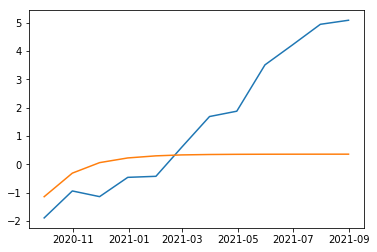

In [97]:
# plot forecasted values vs observed values for validation data in TS2 and print root mean square error
predictions = arma_mod_TS2.predict(start='2020-09-30', end='2021-08-31', dynamic=True)
# report performance
rmse = sqrt(mean_squared_error(TS2_test, predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(TS2_test)
pyplot.plot(predictions)
pyplot.show()

<h3>4. ANN model fitting procedure</h3>

In [98]:
# import libraries
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

1980-01-31   -0.204708
1980-02-29    0.192353
1980-03-31   -0.084332
1980-04-30   -0.837072
1980-05-31    0.816031
dtype: float64


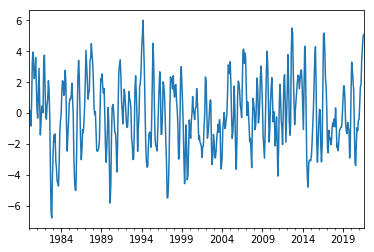

In [99]:
print(TS1.head())
# line plot
TS1.plot()
pyplot.show()

1980-01-31   -0.204708
1980-02-29    0.192353
1980-03-31   -0.084332
1980-04-30   -0.837072
1980-05-31    0.816031
dtype: float64


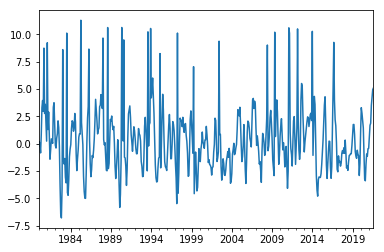

In [100]:
print(TS2.head())
# line plot
TS2.plot()
pyplot.show()

<h3>Persistence Model Forecast</h3>
Baseline Model

RMSE: 0.896


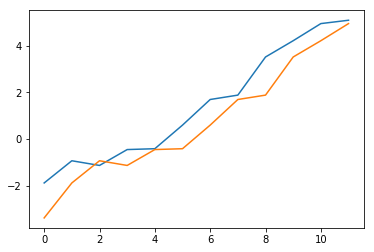

In [101]:
# split data into train and test
X = TS1.values
train, test = X[0:-12], X[-12:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # make prediction
    predictions.append(history[-1])
    # observation
    history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

RMSE: 0.896


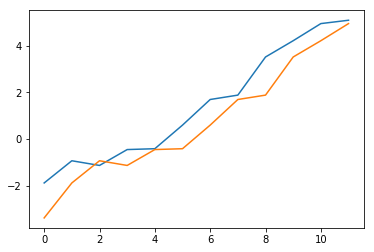

In [102]:
# split data into train and test
X = TS2.values
train, test = X[0:-12], X[-12:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # make prediction
    predictions.append(history[-1])
    # observation
    history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [103]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [104]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [105]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [106]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

In [107]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

<h3> Long Short-Term Memory recurrent neural network model fitting procedure for TS1</h3>

Month=1, Predicted=-2.493093, Expected=-1.887990
Month=2, Predicted=-0.582833, Expected=-0.936715
Month=3, Predicted=-0.543341, Expected=-1.137193
Month=4, Predicted=-0.984844, Expected=-0.456617
Month=5, Predicted=0.267248, Expected=-0.419927
Month=6, Predicted=-0.582772, Expected=0.591934
Month=7, Predicted=1.298455, Expected=1.689647
Month=8, Predicted=1.508657, Expected=1.877750
Month=9, Predicted=1.403592, Expected=3.512217
Month=10, Predicted=3.481361, Expected=4.209811
Month=11, Predicted=2.964277, Expected=4.944123
Month=12, Predicted=3.919187, Expected=5.087330
Test RMSE: 1.062
Runtime: 22.984882831573486


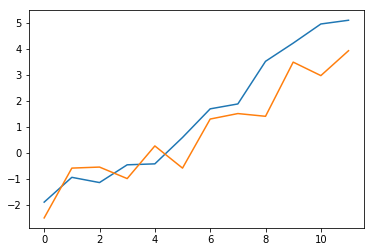

In [108]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(TS1, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

start_time = time.time()

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 20, 4)

end_time = time.time()
runtime = end_time - start_time

# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # store forecast
    predictions.append(yhat)
    raw_values = TS1.values
    expected = raw_values[len(train) + i]
    print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
    
# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
print("Runtime:",runtime)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)
pyplot.show()

<h3> Long Short-Term Memory recurrent neural network model fitting procedure for TS2</h3>

Month=1, Predicted=-2.099524, Expected=-1.887990
Month=2, Predicted=-0.542126, Expected=-0.936715
Month=3, Predicted=-0.047720, Expected=-1.137193
Month=4, Predicted=-0.468680, Expected=-0.456617
Month=5, Predicted=0.337563, Expected=-0.419927
Month=6, Predicted=0.037961, Expected=0.591934
Month=7, Predicted=0.982665, Expected=1.689647
Month=8, Predicted=1.557593, Expected=1.877750
Month=9, Predicted=1.452315, Expected=3.512217
Month=10, Predicted=2.401047, Expected=4.209811
Month=11, Predicted=2.802016, Expected=4.944123
Month=12, Predicted=3.165534, Expected=5.087330
Test RMSE: 1.247
Runtime: 22.64769458770752


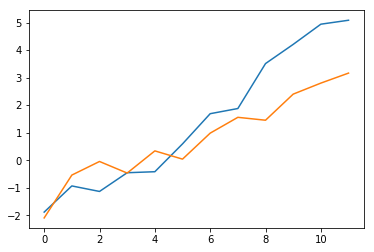

In [110]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(TS2, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

start_time = time.time()

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 20, 4)

end_time = time.time()
runtime = end_time - start_time

# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # store forecast
    predictions.append(yhat)
    raw_values = TS1.values
    expected = raw_values[len(train) + i]
    print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
    
# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
print("Runtime:",runtime)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)
pyplot.show()

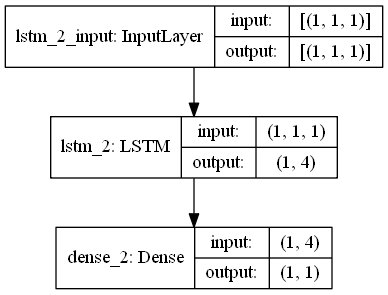

In [118]:
from tensorflow.keras.utils import plot_model
#Vizualize Model
plot_model(lstm_model, to_file='LSTM_model.png', show_shapes=True, show_layer_names=True, expand_nested=True)